In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import subprocess

In [2]:
l = 90
b = 0
dist = 150
output = subprocess.run(['./run_NE2001.pl', str(l), str(b), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
output

'SCINTIME = 0.1416E+03 (s)         ScintTime @1GHz @100 km/s\n'

In [3]:
output.split()

['SCINTIME', '=', '0.1416E+03', '(s)', 'ScintTime', '@1GHz', '@100', 'km/s']

In [4]:
val = output.split()[2]
val

'0.1416E+03'

In [5]:
float(val)

141.6

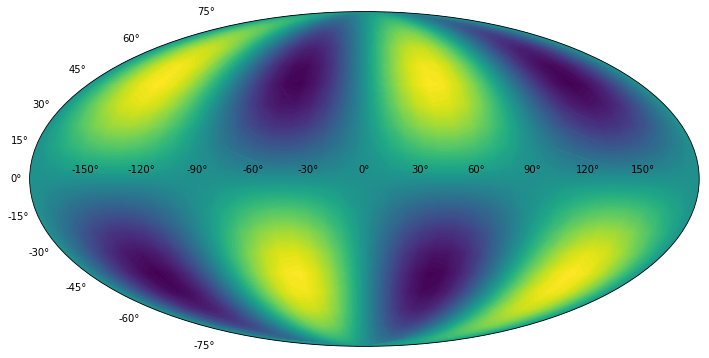

In [6]:
import numpy as np
import pylab as plt

ra = np.linspace(-np.pi, np.pi, 40)
dec= np.linspace(-np.pi/2, np.pi/2, 20)
X,Y = np.meshgrid(ra,dec)
Z = np.sin(X) * np.cos(X) * np.sin(Y) * np.cos(Y)

plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection = 'mollweide')
ax.contourf(X,Y,Z,100)
# plt.grid(color='k')
# ax.contour(X,Y,Z,10,colors='k')

plt.show()

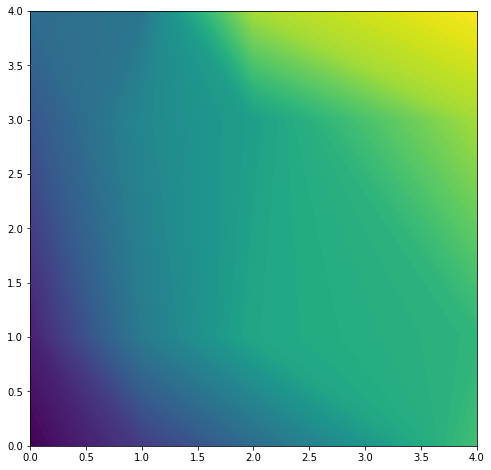

In [26]:
import numpy as np
import pylab as plt

ra = np.array([0,1,2,4])
dec= np.array([0,1,3,4])
X,Y = np.meshgrid(ra,dec)
Z = X + Y/2 + np.sin(X*Y)

plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.contourf(X,Y,Z,100)
# plt.grid(color='k')
# ax.contour(X,Y,Z,10,colors='k')

plt.show()

In [34]:
np.sort(np.array([1,3,-1,4]))

array([-1,  1,  3,  4])

In [ ]:
scint = np.empty((len(dec), len(ra)))
for y in range(len(dec)):
    for x in range(len(ra)):
        print(x, y)
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])
scint

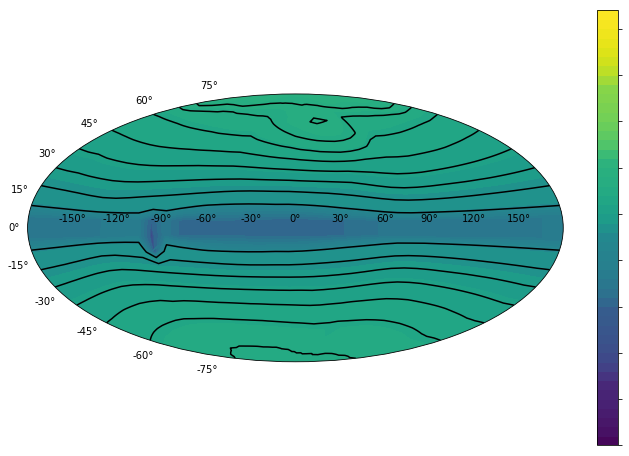

In [10]:
import numpy as np
import pylab as plt
from matplotlib import ticker, cm

ra = np.linspace(-np.pi, np.pi, 40)
dec= np.linspace(-np.pi/2, np.pi/2, 20)
X,Y = np.meshgrid(ra,dec)

fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111, projection = 'mollweide')
ax = plt.subplot(111, projection = 'aitoff')

scint = np.empty((len(dec), len(ra)))
for y in range(len(dec)):
    for x in range(len(ra)):
#         print(x, y)
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])

# plt.grid(color='k')
ax.contour(X,Y,scint,10,colors='k')
c = ax.contourf(X,Y,scint,100,locator=ticker.LogLocator(subs='auto',numticks=10))
fig.colorbar(c)

plt.show()

In [ ]:
dists = [1, 4, 8, 12, 16, 20]
ra = np.linspace(-np.pi, np.pi, 40)
dec= np.linspace(-np.pi/2, np.pi/2, 20)
X,Y = np.meshgrid(ra,dec)

fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111, projection = 'mollweide')
ax = plt.subplot(111, projection = 'aitoff')

scint = np.empty((len(dec), len(ra)))
for y in range(len(dec)):
    for x in range(len(ra)):
#         print(x, y)
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])

# plt.grid(color='k')
ax.contour(X,Y,scint,10,colors='k')
c = ax.contourf(X,Y,scint,100,locator=ticker.LogLocator(subs='auto',numticks=10))
fig.colorbar(c)

plt.show()

In [32]:
X.shape

(20, 40)

In [33]:
Y.shape

(20, 40)

In [38]:
np.empty((20,40)).shape

(20, 40)

In [ ]:
import numpy as np
import pylab as plt
from matplotlib import ticker, cm
from tqdm import tqdm

ra = np.linspace(-np.pi, np.pi, 180)
dec= np.linspace(-np.pi/2, np.pi/2, 45)

fine_ra = np.linspace(-np.pi/6, np.pi/6, 180)
fine_dec = np.linspace(-np.pi/12, np.pi/12, 60)

ra = np.sort(np.append(ra, fine_ra))
dec = np.sort(np.append(dec, fine_dec))
print(len(ra), len(dec))
X,Y = np.meshgrid(ra,dec)
print(X.shape)

scint = np.empty((len(dec), len(ra)))
for y in tqdm(range(len(dec))):
    for x in (range(len(ra))):
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])
    print(scint[y,:])
scint

In [40]:
np.save('scint.npy', scint)
np.save('X.npy', X)
np.save('Y.npy', Y)

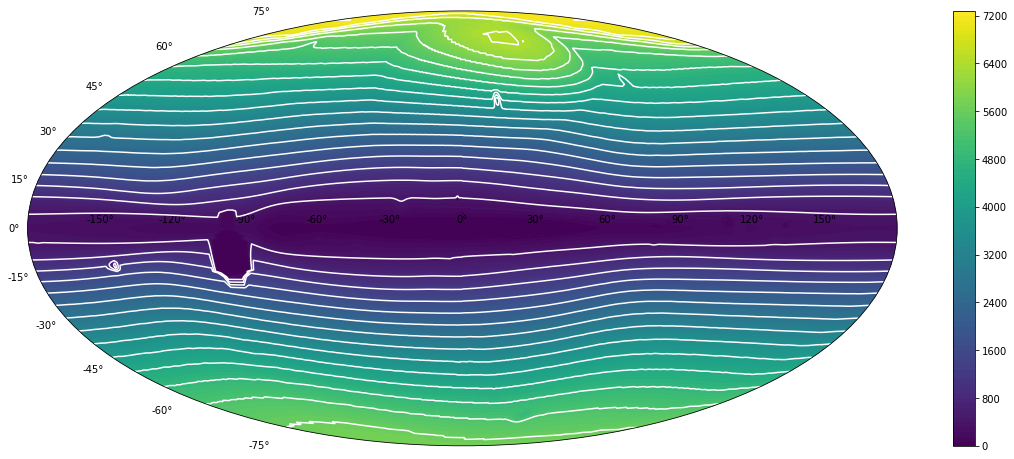

In [49]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111, projection = 'mollweide')
# ax = plt.subplot(111)

# plt.grid(color='w')
ax.contour(X,Y,scint,20,colors='w')
# c = ax.contourf(X,Y,scint,1000,locator=ticker.LogLocator(subs='auto',numticks=10))
c = ax.contourf(X,Y,scint,100)
fig.colorbar(c)

plt.show()

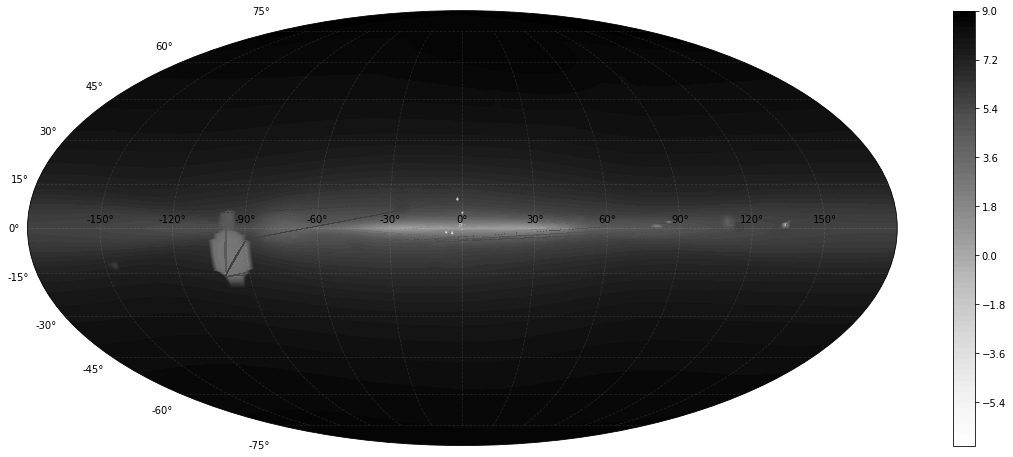

In [112]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111, projection = 'mollweide')
# ax = plt.subplot(111)

plt.grid(color='w', linestyle='--', alpha=0.1)
# ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(X,Y,np.log(scint),100,cmap='Greys')
fig.colorbar(c)

# plt.savefig('test.png')
plt.show()


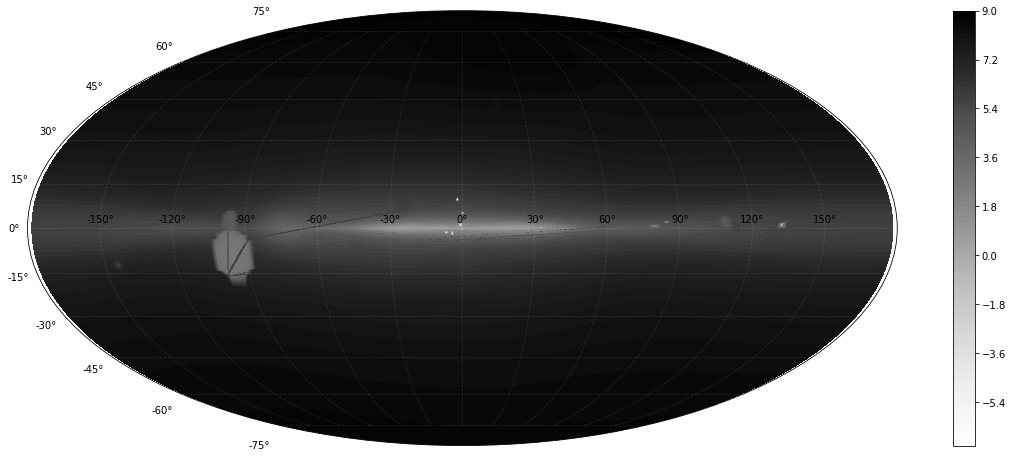

In [123]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111, projection = 'mollweide')
# ax = plt.subplot(111)

frac = 0.99
small_X = X*frac
small_Y = Y*frac
plt.grid(color='w', linestyle='--', alpha=0.1)
# ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(small_X,small_Y,np.log(scint),100,cmap='Greys')
fig.colorbar(c)

# plt.savefig('test.png')
plt.show()



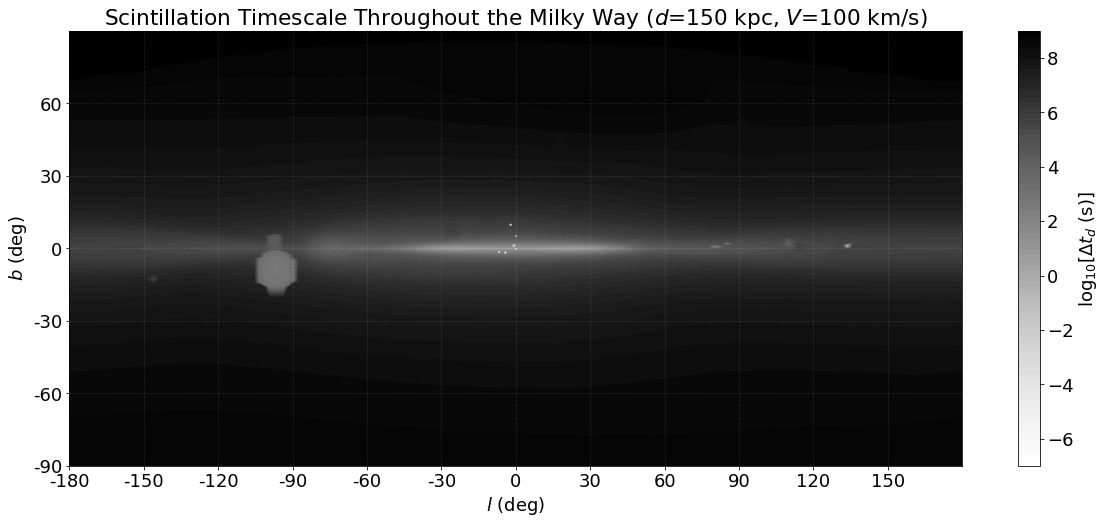

In [156]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)
# ax = plt.subplot(111)

frac = 1.
small_X = X*frac
small_Y = Y*frac
plt.grid(color='w', linestyle='--', alpha=0.1)
# ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(small_X,small_Y,np.log(scint),100,cmap='Greys')
cbar = fig.colorbar(c, ticks=np.arange(-6, 9, step=2.))
cbar.ax.set_ylabel(r'$\log_{10}[\Delta t_d\mathrm{\ (s)}]$', rotation=90)

plt.title(r'Scintillation Timescale Throughout the Milky Way ($d$=150 kpc, $V$=100 km/s)')
plt.xticks(np.arange(-np.pi, np.pi, step=np.pi/6), np.arange(-180, 180, step=180//6))
plt.yticks(np.arange(-np.pi/2, np.pi/2, step=np.pi/6), np.arange(-90, 90, step=180//6))
plt.xlabel(r'$l$ (deg)')
plt.ylabel(r'$b$ (deg)')


plt.savefig('rect.pdf')
plt.show()



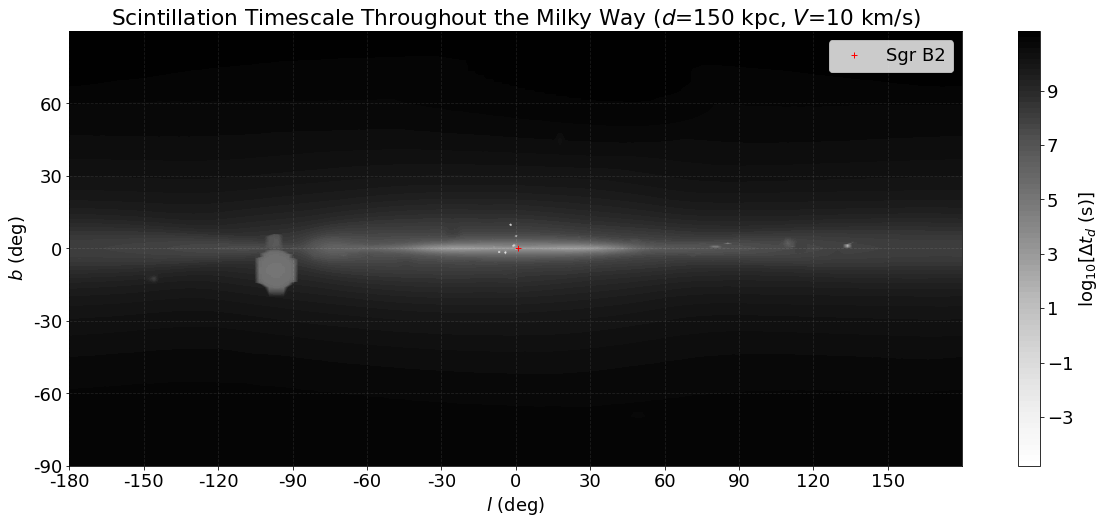

In [183]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)
# ax = plt.subplot(111)

frac = 1.
small_X = X*frac
small_Y = Y*frac
plt.grid(color='w', linestyle='--', alpha=0.1)
# ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(small_X,small_Y,np.log(scint*10),100,cmap='Greys')
cbar = fig.colorbar(c, ticks=np.arange(-5, 10, step=2.))
cbar.ax.set_ylabel(r'$\log_{10}[\Delta t_d\mathrm{\ (s)}]$', rotation=90)

plt.plot([0.6667/180*np.pi], [-0.0362/180*np.pi], '+r', label='Sgr B2')

plt.title(r'Scintillation Timescale Throughout the Milky Way ($d$=150 kpc, $V$=10 km/s)')
plt.xticks(np.arange(-np.pi, np.pi, step=np.pi/6), np.arange(-180, 180, step=180//6))
plt.yticks(np.arange(-np.pi/2, np.pi/2, step=np.pi/6), np.arange(-90, 90, step=180//6))
plt.xlabel(r'$l$ (deg)')
plt.ylabel(r'$b$ (deg)')
plt.legend()

plt.savefig('rect.pdf')
plt.show()




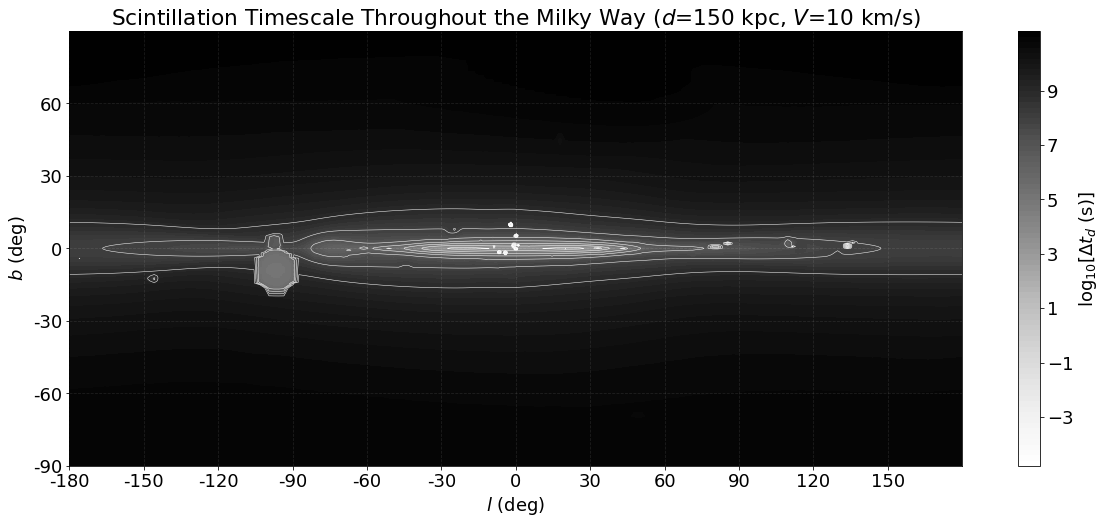

In [168]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)
# ax = plt.subplot(111)

frac = 1.
small_X = X*frac
small_Y = Y*frac
plt.grid(color='w', linestyle='--', alpha=0.1)
ax.contour(X,Y,np.log(scint*10),levels=np.arange(-3, 10),colors='w', linewidths=0.5)
c = ax.contourf(small_X,small_Y,np.log(scint*10),100,cmap='Greys')
cbar = fig.colorbar(c, ticks=np.arange(-5, 10, step=2.))
cbar.ax.set_ylabel(r'$\log_{10}[\Delta t_d\mathrm{\ (s)}]$', rotation=90)

plt.title(r'Scintillation Timescale Throughout the Milky Way ($d$=150 kpc, $V$=10 km/s)')
plt.xticks(np.arange(-np.pi, np.pi, step=np.pi/6), np.arange(-180, 180, step=180//6))
plt.yticks(np.arange(-np.pi/2, np.pi/2, step=np.pi/6), np.arange(-90, 90, step=180//6))
plt.xlabel(r'$l$ (deg)')
plt.ylabel(r'$b$ (deg)')


plt.savefig('rect.pdf')
plt.show()





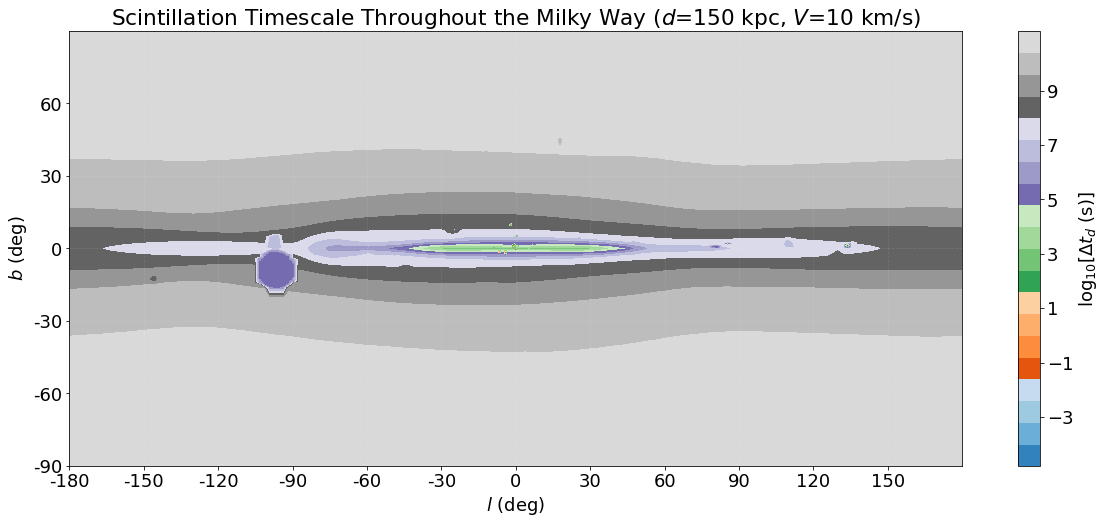

In [161]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)
# ax = plt.subplot(111)

frac = 1.
small_X = X*frac
small_Y = Y*frac
plt.grid(color='w', linestyle='--', alpha=0.1)
# ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(small_X,small_Y,np.log(scint*10),100,cmap='tab20c')
cbar = fig.colorbar(c, ticks=np.arange(-5, 10, step=2.))
cbar.ax.set_ylabel(r'$\log_{10}[\Delta t_d\mathrm{\ (s)}]$', rotation=90)

plt.title(r'Scintillation Timescale Throughout the Milky Way ($d$=150 kpc, $V$=10 km/s)')
plt.xticks(np.arange(-np.pi, np.pi, step=np.pi/6), np.arange(-180, 180, step=180//6))
plt.yticks(np.arange(-np.pi/2, np.pi/2, step=np.pi/6), np.arange(-90, 90, step=180//6))
plt.xlabel(r'$l$ (deg)')
plt.ylabel(r'$b$ (deg)')


plt.savefig('rect.pdf')
plt.show()


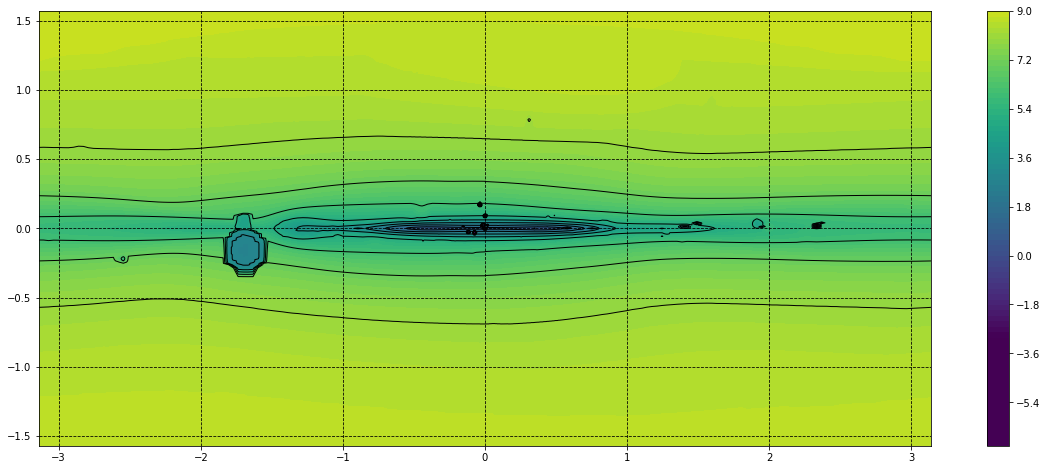

In [72]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)
# ax = plt.subplot(111)

plt.grid(color='k', linestyle='--')
# ax.contour(X,Y,np.log(scint),20,colors='w')
ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
c = ax.contourf(X,Y,np.log(scint),100,vmin=-3, vmax=10)
fig.colorbar(c)

plt.show()

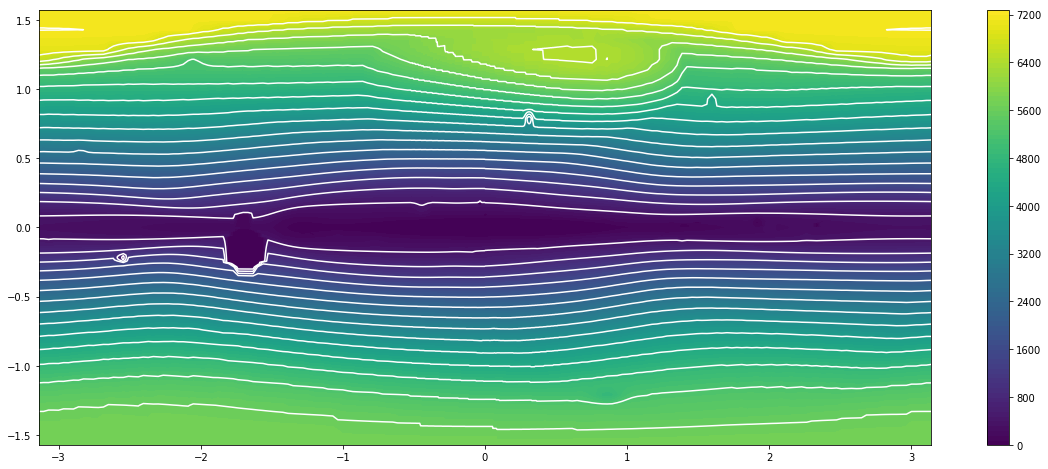

In [42]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111,)
# ax = plt.subplot(111)

# plt.grid(color='w')
ax.contour(X,Y,scint,20,colors='w')
# c = ax.contourf(X,Y,scint,1000,locator=ticker.LogLocator(subs='auto',numticks=10))
c = ax.contourf(X,Y,scint,100)
fig.colorbar(c)

plt.show()

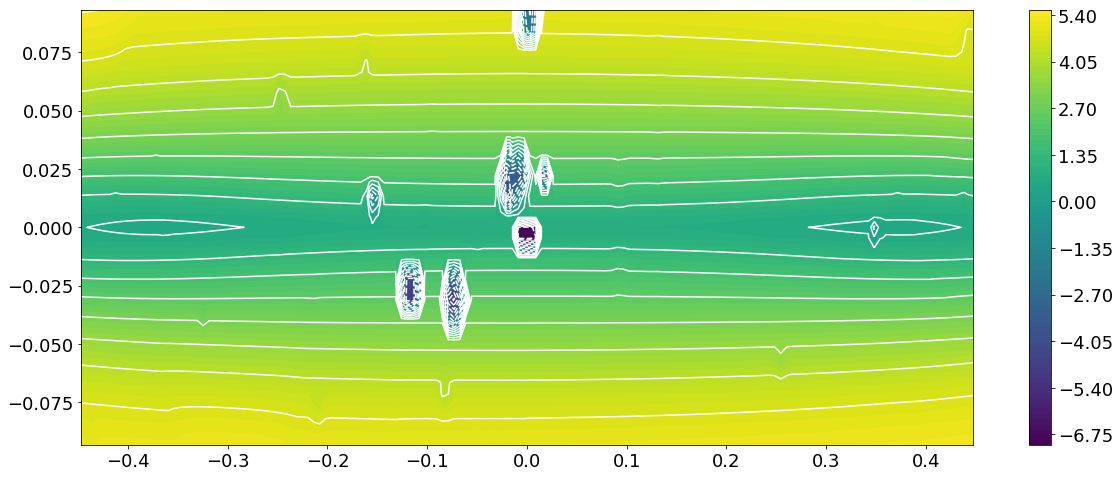

-80


In [185]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111,)
# ax = plt.subplot(111)

# These index things
y_start = 40
y_stop = -40
x_start = 90
x_stop = -90
x = X[y_start:y_stop, x_start:x_stop]
y = Y[y_start:y_stop, x_start:x_stop]
s = scint[y_start:y_stop, x_start:x_stop]
# plt.grid(color='w')
# ax.contour(X[22:-22, 90:-90],Y[22:-22, 90:-90],scint[22:-22, 90:-90],20,colors='w')
# c = ax.contourf(X,Y,scint,1000,locator=ticker.LogLocator(subs='auto',numticks=10))
c = ax.contour(x, y, np.log(s),20, colors='w')
c = ax.contourf(x, y, np.log(s),100)
fig.colorbar(c)

plt.show()

print((y_stop - y_start))

In [ ]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from tqdm import tqdm


dists = [1, 2, 4, 8, 16, 32, 64, 128]
ra = np.linspace(-np.pi, np.pi, 360)
dec= np.linspace(-np.pi/2, np.pi/2, 180)
X,Y = np.meshgrid(ra,dec)
all_scints = []

for dist in tqdm(dists):
    
    fig = plt.figure(figsize=(20,8))
#     ax = plt.subplot(111, projection = 'mollweide')
    ax = plt.subplot(111)

    scint = np.empty((len(dec), len(ra)))
    for y in range(len(dec)):
        for x in range(len(ra)):
    #         print(x, y)
            output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
            scint[y][x] = float(output.split()[2])
        print('Finished dist: %s, dec: %s' % (dist, y))
    np.save('scint_array_dist_%s_kpc.npy' % dist, scint)

    plt.grid(color='w', linestyle='--', alpha=0.1)
    # ax.contour(X,Y,np.log(scint),levels=np.arange(-3, 10),colors='k', linewidths=1)
    c = ax.contourf(X,Y,np.log(scint*10),100,cmap='Greys')
    cbar = fig.colorbar(c, ticks=np.arange(-5, 10, step=2.))
    cbar.ax.set_ylabel(r'$\log_{10}[\Delta t_d\mathrm{\ (s)}]$', rotation=90)

    plt.plot([0.6667/180*np.pi], [-0.0362/180*np.pi], '+r', label='Sgr B2')

    plt.title(r'Scintillation Timescale Throughout the Milky Way ($d$=%s kpc, $V$=10 km/s)' % dist)
    plt.xticks(np.arange(-np.pi, np.pi, step=np.pi/6), np.arange(-180, 180, step=180//6))
    plt.yticks(np.arange(-np.pi/2, np.pi/2, step=np.pi/6), np.arange(-90, 90, step=180//6))
    plt.xlabel(r'$l$ (deg)')
    plt.ylabel(r'$b$ (deg)')
    plt.legend()
    
    plt.savefig('dist_%s_kpc.png' % dist)
    plt.show()


  0%|          | 0/8 [00:00<?, ?it/s]

Finished dist: 1, dec: 0
Finished dist: 1, dec: 1
Finished dist: 1, dec: 2
